In [1]:
import numpy as np


In [36]:
# X = 2 * np.random.rand(100,1)
# y = 4 +3 * X+np.random.randn(100,1)
# lr =0.01
# n_iter = 1000

# theta = np.random.randn(2,1)

# X_b = np.c_[np.ones((len(X),1)),X]
# theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


# print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
# print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

(250, 250)

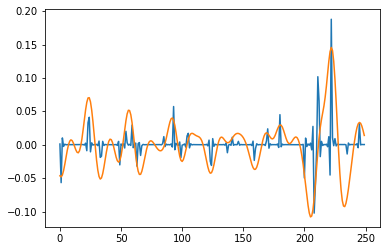

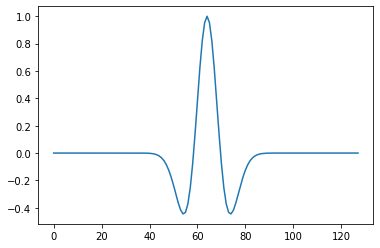

In [3]:
from scipy import signal
from matplotlib import pyplot as plt
%matplotlib inline
from bruges.filters import ricker as ricker_
FS = 1/0.002
def ricky(length, width):
    return ricker_(0.256, 1/FS, width)

wavelet=ricky(400,20)
r = np.load("rpp.npy")

rc =r[300:550]
recorded = signal.convolve(wavelet, rc)
seis_signal=recorded[int(len(wavelet)/2):1-int(len(wavelet)/2)]

plt.figure()
plt.plot(rc)
plt.plot(seis_signal)
plt.figure()
plt.plot(wavelet)
# plt.plot(recovered+0.1)
len(rc),len(seis_signal)

In [4]:
import numpy as np
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    recorded = signal.convolve(X, theta) #wavelet, rc
    predictions=recorded[int(len(X)/2):1-int(len(X)/2)]
#     predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = wavelet
    y    = seismic signal
    theta=rc
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,len(theta)))
    for it in range(iterations):
        
#         prediction = np.dot(X,theta)
        recorded = signal.convolve(X, theta) #wavelet, rc
        prediction=recorded[int(len(X)/2):1-int(len(X)/2)]
        
#         theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        der=signal.convolve(X,  prediction - y) [int(len(X)/2):1-int(len(X)/2)] 
        theta = theta -(1/m)*learning_rate*der
        
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [5]:
# np.random.random(len(seis_signal),(-1,1))


8.259479732339809
0.051855067618180796
0.02022785831510579
0.012096990044508697
0.008967382991133293
0.00732483323556296
0.006260090365379811
0.005478725083455156
0.004865731944255639
0.004367404801534664


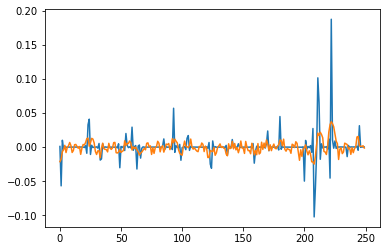

In [35]:
rc=np.zeros(len(seis_signal))
rc=np.random.uniform(-0.01,0.01,len(seis_signal))
rc_f,cost_history,rc_history = gradient_descent(wavelet,seis_signal,rc,learning_rate=4.5,iterations=1000)
# rc =r[300:550]
plt.figure()
plt.plot(r[300:550])
plt.plot(rc_f)
# plt.plot(seis_signal)
for i,c in enumerate(cost_history):
    if i%100==1:
        print(c)